### Creemos una red y vayamos aumentando la cantidad de capas

El objetivo es crear redes con una cantidad incremental de capas. Vamos a fitear los modelos a las función sen(x). Cada ejemplo del dataset toma es un array con 10 números generados con distribución normal. La función a aprender es la que aplica sen(x) elemento a elemento.



In [ ]:
import math
import tensorflow as tf

def sin():
    while True:
        x = tf.random.normal((32, 10), math.pi, 1.5)
        y = tf.math.sin(x)
        yield (x, y)


dts = tf.data.Dataset.from_generator(sin, (tf.float32, tf.float32), ((32, 10), (32, 10)))


Generamos datasets de 32 ejemplos:

In [ ]:
x,y = list(dts.take(1).as_numpy_iterator())[0]

In [ ]:
print(x[0])
print(y[0])
print(tf.math.sin(x[0]))

[1.652143  2.1263995 2.1433144 2.9504085 2.5949512 4.231711  3.9015336
 3.9753962 1.7939446 4.367887 ]
[ 0.9966932   0.84958243  0.8405395   0.19002165  0.5198211  -0.8866816
 -0.6888786  -0.74049294  0.97520554 -0.94124377]
tf.Tensor(
[ 0.9966932   0.84958243  0.8405395   0.19002165  0.5198211  -0.8866816
 -0.6888786  -0.74049294  0.97520554 -0.94124377], shape=(10,), dtype=float32)


In [ ]:
n_capas = 25

import numpy as np
def build_model(n):
    x = inputs = tf.keras.Input((10, ))
    # agregamos n capas de 10 unidades ocultas
    for _ in range(n):
        x = tf.keras.layers.Dense(10, activation="relu")(x)
    x = tf.keras.layers.Dense(10)(x) # capa densa final
    model = tf.keras.Model(inputs, x)
    model.compile("adam", "mse")
    return model

print("Red Neuronal 'normal'")
loss_history = []
for t in range(1, n_capas + 1):
    plain = build_model(t)
    print(plain.summary())
    hist = plain.fit(dts, steps_per_epoch=20, epochs=20*t, verbose=0)
    loss_history.append(hist.history["loss"][-1])
    print(hist.history["loss"][-1])

Red Neuronal 'normal'
Model: "functional_265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_134 (InputLayer)       [(None, 10)]              0         
_________________________________________________________________
dense_1583 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1584 (Dense)           (None, 10)                110       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
0.5498673915863037
Model: "functional_267"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_135 (InputLayer)       [(None, 10)]              0         
_________________________________________________________________
dense_1585 (Dense)           (None, 10)           

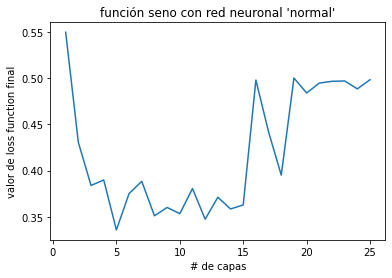

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, n_capas + 1), loss_history)
plt.title("función seno con red neuronal 'normal'")
plt.xlabel("# de capas")
plt.ylabel("valor de loss function final")
plt.show()


In [ ]:
def resblock(inputs):
  x = tf.keras.layers.Dense(10, activation="relu")(inputs)
  x = tf.keras.layers.Dense(10)(x)
  x = x + inputs # 'skip' en la conexión
  x = tf.keras.layers.Activation("relu")(x)
  return x

def build_resnet_model(n): # hacemos una resnet con n capas
    x = inputs = tf.keras.Input((10, ))
    x = tf.keras.layers.Dense(10, activation='relu')(x)

    # cada bloque residual tiene dos capas
    for _ in range((n-2)//2):
        x = resblock(x)

    x = tf.keras.layers.Dense(10)(x)

    model = tf.keras.Model(inputs, x)
    model.compile("adam", "mse")
    return model

resnet_loss_history = []
print("Red Neuronal residual")
for t in range(2, n_capas + 1, 2):
    resnet = build_resnet_model(t)
    print(resnet.summary())
    hist = resnet.fit(dts, steps_per_epoch=20, epochs=20*t, verbose=0)
    resnet_loss_history.append(hist.history["loss"][-1])
    print(resnet_loss_history[-1])

Red Neuronal residual
Model: "functional_315"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_159 (InputLayer)       [(None, 10)]              0         
_________________________________________________________________
dense_1933 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1934 (Dense)           (None, 10)                110       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
0.4521613121032715
Model: "functional_317"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_160 (InputLayer)          [(None, 10)]         0                                            
_________________

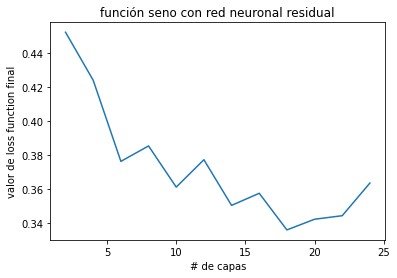

In [ ]:

plt.plot(range(2, n_capas+1, 2), resnet_loss_history)
plt.title("función seno con red neuronal residual")
plt.xlabel("# de capas")
plt.ylabel("valor de loss function final")
plt.show()


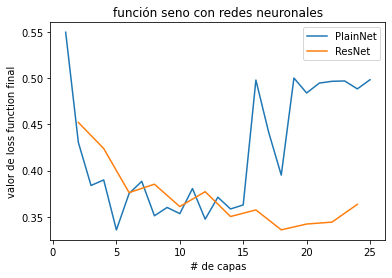

In [ ]:

plt.plot(range(1, n_capas+1), loss_history, label="PlainNet")
plt.plot(range(2, n_capas+1, 2), resnet_loss_history, label="ResNet")
plt.title("función seno con redes neuronales")
plt.xlabel("# de capas")
plt.ylabel("valor de loss function final")
plt.legend()
plt.show()